In [ ]:
#Data analysis practice with AIFS data from ECMWF 
#https://www.ecmwf.int/en/forecasts/datasets/open-data
#@author: yagizcanurkmez

In [2]:
import cfgrib 
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
file_pt = "/Volumes/YagizHDD/Meteorological-Applications/DATA/AIFS/merged_20250228000000_00_to_48.grib2"

# List of typeOfLevel values you want to extract
filter_values_all = ['isobaricInhPa', 'soilLayer','heightAboveGround','surface','lowCloudLayer','mediumCloudLayer','highCloudLayer','entireAtmosphere','meanSea']
filter_values = ['isobaricInhPa', 'soilLayer','heightAboveGround','surface']

# Create an empty list to store the datasets
datasets = []

for value in filter_values:
    df = xr.open_dataset(file_pt, engine="cfgrib", filter_by_keys={'typeOfLevel': value})
    datasets.append(df)

# Optionally, concatenate all datasets
df_combined = xr.merge(datasets)


/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, c

In [4]:
df_combined

<xarray.Dataset> Size: 3GB
Dimensions:            (step: 9, isobaricInhPa: 13, latitude: 721,
                        longitude: 1440, soilLayer: 2)
Coordinates:
    time               datetime64[ns] 8B 2025-02-28
  * step               (step) timedelta64[ns] 72B 0 days 00:00:00 ... 2 days ...
  * isobaricInhPa      (isobaricInhPa) float64 104B 1e+03 925.0 ... 100.0 50.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time         (step) datetime64[ns] 72B 2025-02-28 ... 2025-03-02
  * soilLayer          (soilLayer) float64 16B 1.0 2.0
    heightAboveGround  float64 8B ...
    surface            float64 8B ...
Data variables: (12/18)
    z                  (step, isobaricInhPa, latitude, longitude) float32 486MB ...
    u                  (step, isobaricInhPa, latitude, longitude) float32 486MB ...
    q                  (step, isobaricInhPa, latitude, longitude) float32 486MB ...
    t                  (step, isobaricInhPa, latitude, longitude) float32 486MB ...
    w                  (step, isobaricInhPa, latitude, longitude) float32 486MB ...
    v                  (step, isobaricInhPa, latitude, longitude) float32 486MB ...
    ...                 ...
    sp                 (step, latitude, longitude) float32 37MB ...
    ssrd               (step, latitude, longitude) float32 37MB ...
    strd               (step, latitude, longitude) float32 37MB ...
    cp                 (step, latitude, longitude) float32 37MB ...
    sf                 (step, latitude, longitude) float32 37MB ...
    tp                 (step, latitude, longitude) float32 37MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-02T21:49 GRIB to CDM+CF via cfgrib-0.9.1...

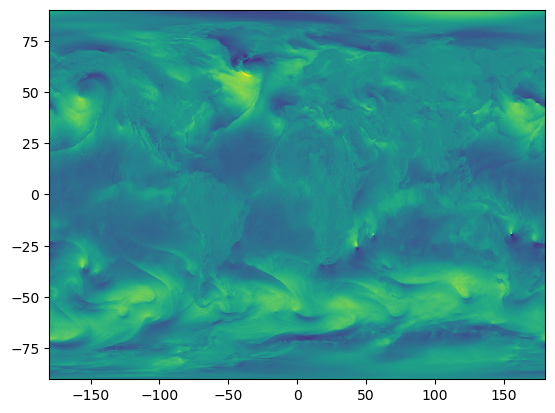

In [5]:
plt.pcolormesh(df_combined.longitude,df_combined.latitude,df_combined.u[0,0,:,:])


In [6]:
#Finding wanted latitude and longitude

def wanted_lat_lon(df,lat,lon):
    lat_num=((max(df.latitude)-lat)*abs(1/(df.latitude[0]-df.latitude[1]))).round() # wanted latitude for spesific point
    lon_num=(abs(min(df.longitude)-lon)*abs(1/(df.longitude[0]-df.longitude[1]))).round() # wanted longitude for spesific point
    print(f"Latitude number is: {int(lat_num)}") 
    print(f"Longitude number is: {int(lon_num)}")
    return int(lat_num), int(lon_num)
    


In [7]:
lat_num, lon_num = wanted_lat_lon(df_combined,41.08,28.9) #Give dataframe, wanted latitude and wanted longitude

Latitude number is: 196
Longitude number is: 836


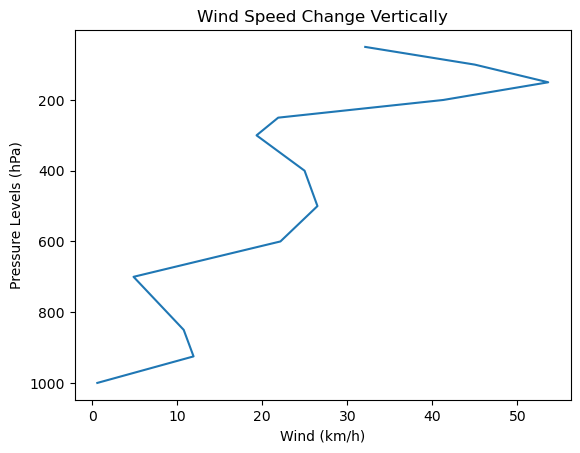

In [19]:
levels = df_combined.isobaricInhPa
wind=df_combined.u[0,0:len(levels),lat_num,lon_num]*3.6
plt.plot(abs(wind),levels) # Vertical wind speed change (absolute wind plotted due to direction)
plt.xlabel("Wind (km/h)")
plt.ylabel("Pressure Levels (hPa)")
plt.title( "Wind Speed Change Vertically")
plt.gca().invert_yaxis()

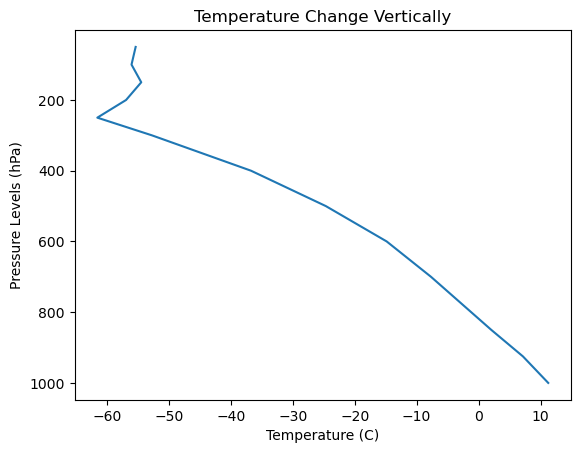

In [23]:
temp=df_combined.t[0,0:len(levels),lat_num,lon_num]-273.15
plt.plot(temp,levels) # Vertical wind speed change according to 
plt.xlabel("Temperature (C)")
plt.ylabel("Pressure Levels (hPa)")
plt.title( "Temperature Change Vertically")
plt.gca().invert_yaxis()

In [12]:
import numpy as np

# Starting single datetime64 value
datetime_value = np.array(df_combined.time)

# Timedelta values array (in nanoseconds)
timedelta_ns = np.array(df_combined.step)  # Example values (43.2s, 86.4s, 129.6s)

# Adding each timedelta value to the same datetime value
new_datetime_values = datetime_value + timedelta_ns.astype('timedelta64[ns]')

print(datetime_value)
print(new_datetime_values)

2025-02-28T00:00:00.000000000
['2025-02-28T00:00:00.000000000' '2025-02-28T06:00:00.000000000'
 '2025-02-28T12:00:00.000000000' '2025-02-28T18:00:00.000000000'
 '2025-03-01T00:00:00.000000000' '2025-03-01T06:00:00.000000000'
 '2025-03-01T12:00:00.000000000' '2025-03-01T18:00:00.000000000'
 '2025-03-02T00:00:00.000000000']


In [20]:
#Basic example for homework YSB575E
from scipy import stats

temp_00 = df_combined.t[0:len(df_combined.step),0,lat_num,lon_num]-273.15

temp_mean = np.mean(temp_00)
print("Mean is :",float(temp_mean))
temp_mode=[]
if stats.mode(temp_00)[0] == temp_00.min():
    temp_mode=[0]
    print(f"There is no mode : {temp_mode}")
else:
    temp_mode=stats.mode(temp_00)

temp_median = np.median(temp_00)
print("Median is:",temp_median)
temp_range= max(temp_00)-min(temp_00)
print("Range:",float(temp_range))

Mean is : 7.425004959106445
There is no mode : [0]
Median is: 6.2163086
Range: 6.560577392578125


Text(0.5, 1.0, 'Temperature at 1000hPa Forecast AIFS ECMWF')

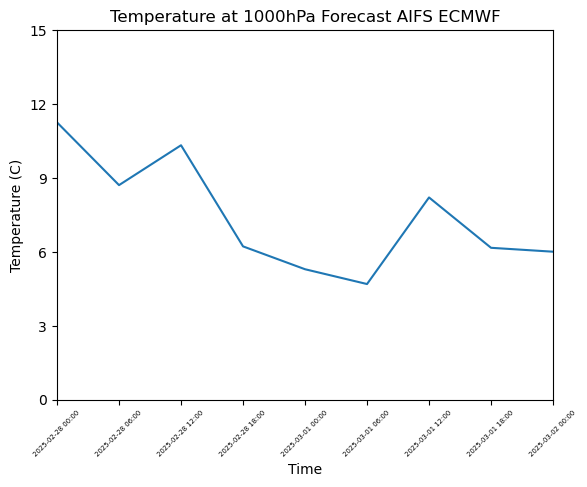

In [28]:
import matplotlib.dates as mdates

plt.plot(new_datetime_values,temp_00)


# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Show every 6 hours
# Set the x-axis limits to start from the first datetime value
plt.xlim([new_datetime_values[0], new_datetime_values[-1]])
# Rotate and resize x-axis labels
plt.xticks(rotation=45, fontsize=5)  # Reduce font size for x labels
plt.ylim(0,15)
plt.yticks(range(0, 16, 3))
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.title("Temperature at 1000hPa Forecast AIFS ECMWF")


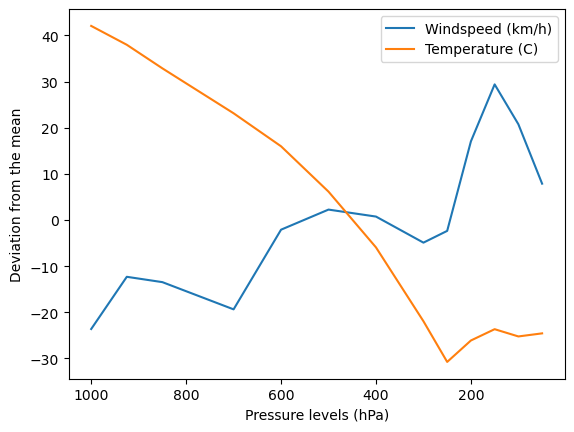

In [24]:
plt.plot(levels,abs(wind)-(abs(wind).mean()),label="Windspeed (km/h)")
plt.plot(levels,temp-temp.mean(),label = "Temperature (C)")
plt.legend()
plt.xlabel("Pressure levels (hPa)")
plt.ylabel("Deviation from the mean")
plt.gca().invert_xaxis()


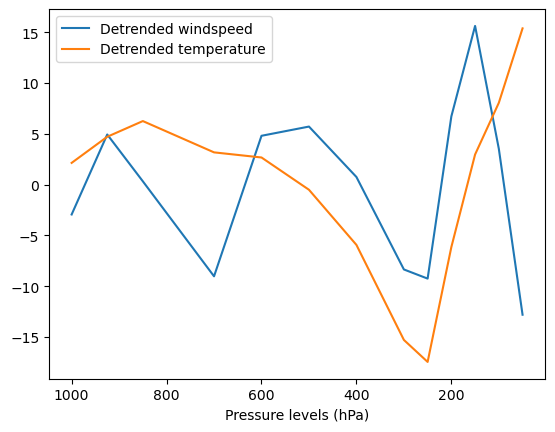

In [25]:
#DETREND
from scipy.signal import detrend
plt.plot(levels,detrend(abs(wind),type="linear"),label="Detrended windspeed")
plt.plot(levels,detrend(temp,type="linear"),label="Detrended temperature")
plt.legend()
plt.xlabel("Pressure levels (hPa)")
plt.gca().invert_xaxis()

In [26]:
lat_N, lon_W= wanted_lat_lon(df_combined,42.1,25.46) #Marmara Region
lat_S, lon_E= wanted_lat_lon(df_combined,39.21,31.01)

lat=df_combined.latitude[lat_N:lat_S+1]
lon=df_combined.longitude[lon_W:lon_E+1]


Latitude number is: 192
Longitude number is: 822
Latitude number is: 203
Longitude number is: 844


Text(0.5, 1.0, ' 28 February 00:00 UTC Forecast AIFS at 1000 hPa ')

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


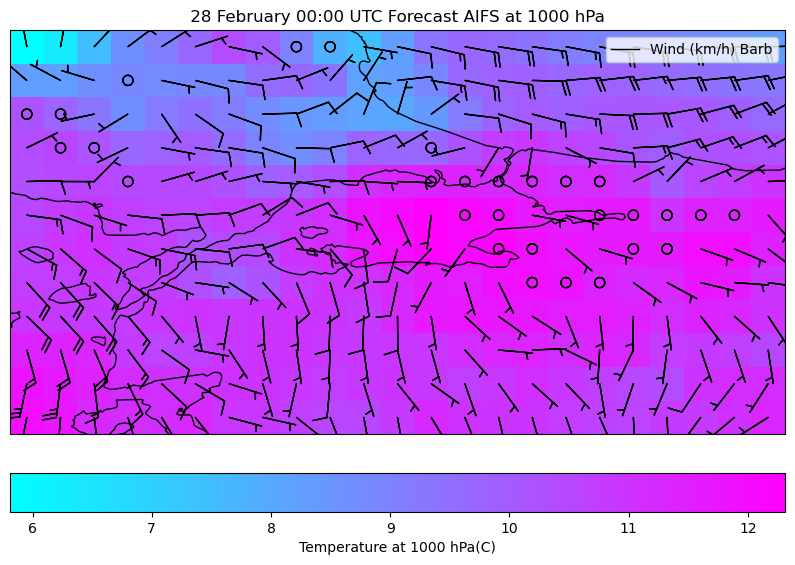

In [27]:
wind_1000_u= df_combined.u[0,0,lat_N:lat_S+1,lon_W:lon_E+1]*3.6 #km/h
wind_1000_v= df_combined.v[0,0,lat_N:lat_S+1,lon_W:lon_E+1]*3.6
temp_1000= df_combined.t[0,0,lat_N:lat_S+1,lon_W:lon_E+1]-273.15

import cartopy.crs as ccrs
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(10,15),subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
b=plt.pcolormesh(lon,lat,temp_1000,cmap="cool")
plt.barbs(lon,lat,wind_1000_u,wind_1000_v)
a=plt.colorbar(b,orientation="horizontal",anchor=(0, 2), shrink=1)
legend_handles = [
    Line2D([0], [0], color="black", lw=1, label="Wind (km/h) Barb")
]
# Add legend
plt.legend(handles=legend_handles, loc="upper right")
a.set_label("Temperature at 1000 hPa(C)")
plt.title(" 28 February 00:00 UTC Forecast AIFS at 1000 hPa ")